In [3]:
import xrfdc
import xrfclk
from pynq import Overlay


In [6]:
ol=Overlay('dac_adc_loopback.bit')



In [7]:
ol?

In [22]:
xrfclk.set_all_ref_clks(409.6)

In [13]:
rfdc_1=ol.usp_rf_data_converter_0
dac_tile = rfdc_1.dac_tiles[1]
dac_tile.PLLConfig

{'Enabled': 1,
 'RefClkFreq': 409.6,
 'SampleRate': 1.024,
 'RefClkDivider': 1,
 'FeedbackDivider': 25,
 'OutputDivider': 10,
 'FractionalMode': 0,
 'FractionalData': 0,
 'FractWidth': 0}

In [17]:
dac_block = dac_tile.blocks[2]
dac_block.MixerSettings

{'Freq': 0.0,
 'PhaseOffset': 0.0,
 'EventSource': 2,
 'CoarseMixFreq': 16,
 'MixerMode': 4,
 'FineMixerScale': 0,
 'MixerType': 1}

In [16]:
adc_tile = rfdc_1.adc_tiles[0]
adc_tile.PLLConfig

{'Enabled': 1,
 'RefClkFreq': 409.6,
 'SampleRate': 1.024,
 'RefClkDivider': 1,
 'FeedbackDivider': 25,
 'OutputDivider': 10,
 'FractionalMode': 0,
 'FractionalData': 0,
 'FractWidth': 0}

In [18]:
adc_block = adc_tile.blocks[0]
adc_block.MixerSettings

{'Freq': 0.0,
 'PhaseOffset': 0.0,
 'EventSource': 2,
 'CoarseMixFreq': 16,
 'MixerMode': 4,
 'FineMixerScale': 0,
 'MixerType': 1}

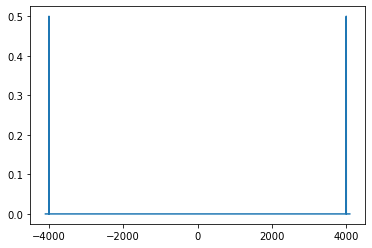

In [19]:
import numpy as np

from pynq import allocate
from matplotlib import pyplot as plt


ns=8192 # No of samples
fs=8192
f=4000
n=16
T=1*ns/fs;
t=np.arange(0,T,1/fs)
signal_float=np.cos(2*np.pi*f*t)
signal_int=np.int16(signal_float*(2**(n-1) - 1))
signal_int = signal_int.astype(np.int32)
N_FFT=8192
fft=np.fft.fft(signal_int,N_FFT)
fft_freq=np.fft.fftfreq(N_FFT,1/fs)
fft_shift=np.fft.fftshift(fft)/8192/(2**(n-1))
fft_freq=np.fft.fftshift(fft_freq)
fft_abs=np.abs(fft_shift)
plt.plot(fft_freq,fft_abs)

In [20]:
ol.axi_dma_adc.register_map

RegisterMap {
  MM2S_DMACR = Register(RS=0, Reset=0, Keyhole=0, Cyclic_BD_Enable=0, IOC_IrqEn=0, Dly_IrqEn=0, Err_IrqEn=0, IRQThreshold=0, IRQDelay=0),
  MM2S_DMASR = Register(Halted=0, Idle=0, SGIncld=0, DMAIntErr=0, DMASlvErr=0, DMADecErr=0, SGIntErr=0, SGSlvErr=0, SGDecErr=0, IOC_Irq=0, Dly_Irq=0, Err_Irq=0, IRQThresholdSts=0, IRQDelaySts=0),
  MM2S_CURDESC = Register(Current_Descriptor_Pointer=0),
  MM2S_CURDESC_MSB = Register(Current_Descriptor_Pointer=0),
  MM2S_TAILDESC = Register(Tail_Descriptor_Pointer=0),
  MM2S_TAILDESC_MSB = Register(Tail_Descriptor_Pointer=0),
  MM2S_SA = Register(Source_Address=0),
  MM2S_SA_MSB = Register(Source_Address=0),
  MM2S_LENGTH = Register(Length=0),
  SG_CTL = Register(SG_CACHE=0, SG_USER=0),
  S2MM_DMACR = Register(RS=1, Reset=0, Keyhole=0, Cyclic_BD_Enable=0, IOC_IrqEn=0, Dly_IrqEn=0, Err_IrqEn=0, IRQThreshold=1, IRQDelay=0),
  S2MM_DMASR = Register(Halted=0, Idle=0, SGIncld=0, DMAIntErr=0, DMASlvErr=0, DMADecErr=0, SGIntErr=0, SGSlvErr=0, SG

In [21]:
ol.axi_dma_dac.register_map

RegisterMap {
  MM2S_DMACR = Register(RS=1, Reset=0, Keyhole=0, Cyclic_BD_Enable=0, IOC_IrqEn=0, Dly_IrqEn=0, Err_IrqEn=0, IRQThreshold=1, IRQDelay=0),
  MM2S_DMASR = Register(Halted=0, Idle=0, SGIncld=0, DMAIntErr=0, DMASlvErr=0, DMADecErr=0, SGIntErr=0, SGSlvErr=0, SGDecErr=0, IOC_Irq=0, Dly_Irq=0, Err_Irq=0, IRQThresholdSts=0, IRQDelaySts=0),
  MM2S_CURDESC = Register(Current_Descriptor_Pointer=0),
  MM2S_CURDESC_MSB = Register(Current_Descriptor_Pointer=0),
  MM2S_TAILDESC = Register(Tail_Descriptor_Pointer=0),
  MM2S_TAILDESC_MSB = Register(Tail_Descriptor_Pointer=0),
  MM2S_SA = Register(Source_Address=0),
  MM2S_SA_MSB = Register(Source_Address=0),
  MM2S_LENGTH = Register(Length=0),
  SG_CTL = Register(SG_CACHE=0, SG_USER=0),
  S2MM_DMACR = Register(RS=0, Reset=0, Keyhole=0, Cyclic_BD_Enable=0, IOC_IrqEn=0, Dly_IrqEn=0, Err_IrqEn=0, IRQThreshold=0, IRQDelay=0),
  S2MM_DMASR = Register(Halted=0, Idle=0, SGIncld=0, DMAIntErr=0, DMASlvErr=0, DMADecErr=0, SGIntErr=0, SGSlvErr=0, SG

In [23]:
rfdc_dac_data=ol.axi_dma_dac

In [24]:
rfdc_adc_data=ol.axi_dma_adc

In [25]:
input_buffer=allocate((8192,),dtype=np.int32)
output_buffer=allocate((8192,),dtype=np.int32)


In [26]:
output=np.array([0]*8192,dtype=np.int32)

In [27]:
np.copyto(input_buffer,signal_int)

In [29]:
send_channel=rfdc_dac_data.sendchannel
recv_channel=rfdc_adc_data.recvchannel

In [33]:
%%time
send_channel.transfer(input_buffer)
recv_channel.transfer(output_buffer)
send_channel.wait()
recv_channel.wait()

RuntimeError: DMA channel not started

In [34]:
ol.axi_dma_adc.register_map

RegisterMap {
  MM2S_DMACR = Register(RS=0, Reset=0, Keyhole=0, Cyclic_BD_Enable=0, IOC_IrqEn=0, Dly_IrqEn=0, Err_IrqEn=0, IRQThreshold=0, IRQDelay=0),
  MM2S_DMASR = Register(Halted=0, Idle=0, SGIncld=0, DMAIntErr=0, DMASlvErr=0, DMADecErr=0, SGIntErr=0, SGSlvErr=0, SGDecErr=0, IOC_Irq=0, Dly_Irq=0, Err_Irq=0, IRQThresholdSts=0, IRQDelaySts=0),
  MM2S_CURDESC = Register(Current_Descriptor_Pointer=0),
  MM2S_CURDESC_MSB = Register(Current_Descriptor_Pointer=0),
  MM2S_TAILDESC = Register(Tail_Descriptor_Pointer=0),
  MM2S_TAILDESC_MSB = Register(Tail_Descriptor_Pointer=0),
  MM2S_SA = Register(Source_Address=0),
  MM2S_SA_MSB = Register(Source_Address=0),
  MM2S_LENGTH = Register(Length=0),
  SG_CTL = Register(SG_CACHE=0, SG_USER=0),
  S2MM_DMACR = Register(RS=0, Reset=0, Keyhole=0, Cyclic_BD_Enable=0, IOC_IrqEn=0, Dly_IrqEn=0, Err_IrqEn=0, IRQThreshold=1, IRQDelay=0),
  S2MM_DMASR = Register(Halted=1, Idle=0, SGIncld=0, DMAIntErr=1, DMASlvErr=0, DMADecErr=0, SGIntErr=0, SGSlvErr=0, SG

In [35]:
ol.axi_dma_dac.register_map

RegisterMap {
  MM2S_DMACR = Register(RS=1, Reset=0, Keyhole=0, Cyclic_BD_Enable=0, IOC_IrqEn=0, Dly_IrqEn=0, Err_IrqEn=0, IRQThreshold=1, IRQDelay=0),
  MM2S_DMASR = Register(Halted=0, Idle=1, SGIncld=0, DMAIntErr=0, DMASlvErr=0, DMADecErr=0, SGIntErr=0, SGSlvErr=0, SGDecErr=0, IOC_Irq=1, Dly_Irq=0, Err_Irq=0, IRQThresholdSts=0, IRQDelaySts=0),
  MM2S_CURDESC = Register(Current_Descriptor_Pointer=0),
  MM2S_CURDESC_MSB = Register(Current_Descriptor_Pointer=0),
  MM2S_TAILDESC = Register(Tail_Descriptor_Pointer=0),
  MM2S_TAILDESC_MSB = Register(Tail_Descriptor_Pointer=0),
  MM2S_SA = Register(Source_Address=2010972160),
  MM2S_SA_MSB = Register(Source_Address=0),
  MM2S_LENGTH = Register(Length=32768),
  SG_CTL = Register(SG_CACHE=0, SG_USER=0),
  S2MM_DMACR = Register(RS=0, Reset=0, Keyhole=0, Cyclic_BD_Enable=0, IOC_IrqEn=0, Dly_IrqEn=0, Err_IrqEn=0, IRQThreshold=0, IRQDelay=0),
  S2MM_DMASR = Register(Halted=0, Idle=0, SGIncld=0, DMAIntErr=0, DMASlvErr=0, DMADecErr=0, SGIntErr=0, S